#LATIFÚNDIO - LIMPEZA DOS DADOS DO CAR
Esse é o código que usei para explorar os dados do Cadastro Ambiental Rural (CAR) para cada UF do Brasil, usando os polígonos de área total dos imóveis rurais. Uma limpeza foi necessária para que eu pudesse chegar ao maior polígono de cada estado.

In [1]:
import geopandas as gpd
# precisamos instalar o mapclassify também
# para usar algumas funcionalidades do geopandas
!pip install mapclassify
# pandas não é necessário, mas vamos usá-lo também
import pandas as pd
# vamos usar o xyzservices para importar um mapa base satélite do google
!pip install xyzservices
import xyzservices

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.2 MB/s eta 0:00:00


In [5]:
# Carregue os arquivos (usei meu drive. Se quiser reproduzir, use o arquivo e o caminho onde você salvou o shp)
shapefile = '/content/drive/MyDrive/ÁREAS IMÓVEIS NACIONAL/AREA_IMOVEL_SP/AREA_IMOVEL_1.shp'
poligonos_car = gpd.read_file(shapefile)



Número de polígonos: 438865
Colunas disponíveis: Index(['cod_tema', 'nom_tema', 'cod_imovel', 'mod_fiscal', 'num_area',
       'ind_status', 'ind_tipo', 'des_condic', 'municipio', 'cod_estado',
       'geometry'],
      dtype='object')
Sistema de Coordenadas: EPSG:4674
      cod_tema        nom_tema                                   cod_imovel  \
0  AREA_IMOVEL  Area do Imovel  SP-3522406-FDCBBA1368D64613AEC7E6DE4319D859   
1  AREA_IMOVEL  Area do Imovel  SP-3519600-1E3A98A2FA4D4835B9FCADA84272E8F3   
2  AREA_IMOVEL  Area do Imovel  SP-3501103-EE546BEA825A4F208EFC8CEBA359BE93   
3  AREA_IMOVEL  Area do Imovel  SP-3520707-E6349343AEBE494EBD7A3E687C7A3B14   
4  AREA_IMOVEL  Area do Imovel  SP-3551801-64EBC0A7D0754943A78812CE7FB10D53   

   mod_fiscal  num_area ind_status ind_tipo  \
0     20.3345  408.1026         AT      IRU   
1      0.4200    5.0397         CA      IRU   
2      0.6022   18.7811         AT      IRU   
3      1.3171   40.1483         AT      IRU   
4      1.8012   28.8

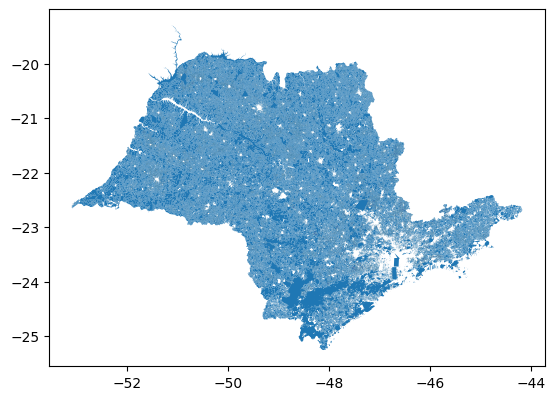

In [6]:
# Exiba informações sobre os dados
print(f"Número de polígonos: {len(poligonos_car)}")
print(f"Colunas disponíveis: {poligonos_car.columns}")
print(f"Sistema de Coordenadas: {poligonos_car.crs}")

# Visualize os polígonos no mapa
poligonos_car.plot()

# Acesse os detalhes dos polígonos
print(poligonos_car.head())
print(poligonos_car.describe())

In [7]:
# Remover a coluna mod_fiscal
poligonos_car_filtrados = poligonos_car.drop(columns=['mod_fiscal'])

# Filtrar apenas polígonos com IRU na coluna ind_tipo
poligonos_car_filtrados = poligonos_car_filtrados[poligonos_car_filtrados['ind_tipo'] == 'IRU']

# Excluir polígonos com CA na coluna ind_status
poligonos_car_filtrados = poligonos_car_filtrados[poligonos_car_filtrados['ind_status'] != 'CA']

In [8]:
# Remover as colunas cod_tema e nom_tema
poligonos_car_filtrados = poligonos_car_filtrados.drop(columns=['cod_tema'])
poligonos_car_filtrados = poligonos_car_filtrados.drop(columns=['nom_tema'])

In [ ]:
poligonos_car_filtrados

,cod_imovel,num_area,ind_status,ind_tipo,des_condic,municipio,cod_estado,geometry
0,TO-1702406-902DEAE648504049AB53AAEF12D7E7F6,162.8702,AT,IRU,Aguardando analise,Arraias,TO,"POLYGON ((-47.36447 -13.21409, -47.36915 -13.2..."
1,TO-1702208-EFCC6E0881B3490D8B81849B8FFAF113,73.8782,AT,IRU,Aguardando analise,Araguatins,TO,"POLYGON ((-48.00392 -5.71507, -48.00343 -5.715..."
3,TO-1718881-5BDC2746493E46BD8A8BA08CC3A6240A,1160.0425,AT,IRU,Aguardando analise,Santa Maria do Tocantins,TO,"POLYGON ((-47.51535 -8.82599, -47.50541 -8.866..."
4,TO-1720978-980F65B89F7D4BD8A64495AF06A6771D,113.5843,AT,IRU,Aguardando analise,Talisma,TO,"POLYGON ((-49.12858 -12.77457, -49.12467 -12.7..."
5,TO-1714302-4736BEBF3CEE4B069FAEC80454512477,4.8408,AT,IRU,Aguardando analise,Nazare,TO,"POLYGON ((-47.857 -6.24634, -47.85784 -6.24569..."
...,...,...,...,...,...,...,...,...
101089,TO-1702109-81D199B65AEC4251B00A3488AC6A66A7,156.8312,AT,IRU,Aguardando analise,Araguaina,TO,"POLYGON ((-48.28333 -7.00759, -48.28221 -7.012..."
101090,TO-1713700-3729EF53E8FB4522A44FB36AB39D9D1E,80.8909,AT,IRU,Aguardando analise,Monte Santo do Tocantins,TO,"POLYGON ((-48.94229 -10.06235, -48.94437 -10.0..."
101091,TO-1716208-36C9ACD3E9334A8B840607E2B04A12D4,966.5281,AT,IRU,Aguardando analise,Parana,TO,"POLYGON ((-48.00585 -12.1815, -48.00508 -12.18..."
101092,TO-1717909-356E35AA58674C27A3ACA5D29C8BC48D,64.9621,AT,IRU,Aguardando analise,Ponte Alta do Tocantins,TO,"POLYGON ((-47.05373 -10.55918, -47.0935 -10.58..."


Número de polígonos: 63291
Colunas disponíveis: Index(['cod_imovel', 'num_area', 'ind_status', 'ind_tipo', 'des_condic',
       'municipio', 'cod_estado', 'geometry'],
      dtype='object')
Sistema de Coordenadas: EPSG:4674
           num_area
count  63291.000000
mean      46.308749
std      212.662320
min        0.004000
25%        5.409850
50%       14.089900
75%       36.626000
max    24980.252500


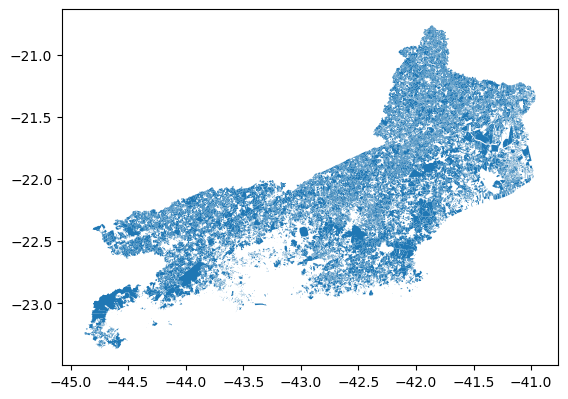

In [ ]:
# Exiba informações sobre os dados
print(f"Número de polígonos: {len(poligonos_car_filtrados)}")
print(f"Colunas disponíveis: {poligonos_car_filtrados.columns}")
print(f"Sistema de Coordenadas: {poligonos_car_filtrados.crs}")

# Visualize os polígonos no mapa
poligonos_car_filtrados.plot()

# Acesse os detalhes dos polígonos
print(poligonos_car_filtrados.describe())

In [9]:
# Valores únicos na coluna ind_tipo
print(poligonos_car_filtrados['ind_tipo'].unique())

# Valores únicos na coluna ind_status
print(poligonos_car_filtrados['ind_status'].unique())

['IRU']
['AT' 'PE' 'SU']


In [10]:
# Contagem de linhas por variável na coluna des_condic
print(poligonos_car_filtrados['des_condic'].value_counts())

des_condic
Analisado, aguardando atendimento a notificacao                              241736
Aguardando analise                                                            57957
Analisado, em conformidade com a Lei n 12.651/2012                            44289
Aguardando analise, apos revisao ou atendimento da notificacao                41282
Analisado, aguardando regularizacao ambiental (Lei n 12.651/2012)             25361
Analisado, em conformidade com a Lei n 12.651/2012, com ativos ambientais     11935
Em analise                                                                      732
Analisado, em regularizacao ambiental (Lei n 12.651/2012)                       255
Cancelado por duplicidade                                                         7
Name: count, dtype: int64


In [11]:
# Excluir polígonos com CA na coluna ind_status
poligonos_car_filtrados = poligonos_car_filtrados[poligonos_car_filtrados['des_condic'] != 'Cancelado por duplicidade']

In [ ]:
# Excluir polígonos com CA na coluna ind_status
poligonos_car_filtrados = poligonos_car_filtrados[poligonos_car_filtrados['des_condic'] != 'Cancelado por decisao administrativa']

In [12]:
# Valores únicos na coluna des_condic
print(poligonos_car_filtrados['des_condic'].unique())

['Analisado, aguardando atendimento a notificacao' 'Aguardando analise'
 'Analisado, em conformidade com a Lei n 12.651/2012'
 'Analisado, aguardando regularizacao ambiental (Lei n 12.651/2012)'
 'Aguardando analise, apos revisao ou atendimento da notificacao'
 'Analisado, em conformidade com a Lei n 12.651/2012, com ativos ambientais'
 'Em analise' 'Analisado, em regularizacao ambiental (Lei n 12.651/2012)']


In [13]:
# Classificação dos grupos de área
def classificar_area(area):
    if area <= 10:
        return 'Até 10 ha'
    elif area <= 50:
        return 'De mais de 10 ha até 50 ha'
    elif area <= 500:
        return 'De mais de 50 até 500 ha'
    elif area <= 1000:
        return 'De mais de 500 a 1000 ha'
    elif area <= 2500:
        return 'De mais de 1000 até 2 500 ha'
    else:
        return 'Mais de 2500 ha'

# Criar nova coluna com a classificação
poligonos_car_filtrados['grupo_area'] = poligonos_car_filtrados['num_area'].apply(classificar_area)

# Contagem de cada grupo
contagem_grupos = poligonos_car_filtrados['grupo_area'].value_counts().sort_index()
print("Contagem de polígonos por grupo de área:")
print(contagem_grupos)

Contagem de polígonos por grupo de área:
grupo_area
Até 10 ha                       176585
De mais de 10 ha até 50 ha      168024
De mais de 1000 até 2 500 ha      1619
De mais de 50 até 500 ha         73095
De mais de 500 a 1000 ha          3841
Mais de 2500 ha                    383
Name: count, dtype: int64


In [14]:
# Contagem de linhas com valores exatos
contagem_valores_exatos = {
    '10 ha': (poligonos_car_filtrados['num_area'] == 10).sum(),
    '50 ha': (poligonos_car_filtrados['num_area'] == 50).sum(),
    '500 ha': (poligonos_car_filtrados['num_area'] == 500).sum(),
    '1000 ha': (poligonos_car_filtrados['num_area'] == 1000).sum(),
    '2500 ha': (poligonos_car_filtrados['num_area'] == 2500).sum()
}

print("\nContagem de linhas com valores exatos:")
for valor, contagem in contagem_valores_exatos.items():
    print(f"{valor}: {contagem}")


Contagem de linhas com valores exatos:
10 ha: 4
50 ha: 1
500 ha: 0
1000 ha: 0
2500 ha: 0


In [15]:

# Lista de grupos de área
grupos_area = [
    'Até 10 ha',
    'De mais de 10 ha até 50 ha',
    'De mais de 50 até 500 ha',
    'De mais de 500 a 1000 ha',
    'De mais de 1000 até 2 500 ha',
    'Mais de 2500 ha'
]

# Calcular total de área por grupo
total_area_por_grupo = poligonos_car_filtrados.groupby(
    ['municipio', poligonos_car_filtrados['num_area'].apply(classificar_area)]
).agg({
    'num_area': ['count', 'sum']
}).reset_index()

# Renomear colunas
total_area_por_grupo.columns = ['municipio', 'grupo_area', 'num_estabelecimentos', 'area_estabelecimentos']

# Criar uma base com todos os municípios e grupos de área
todos_municipios = total_area_por_grupo['municipio'].unique()
todos_combinacoes = pd.MultiIndex.from_product(
    [todos_municipios, grupos_area], names=['municipio', 'grupo_area']
).to_frame(index=False)

# Combinar com os dados calculados, preenchendo valores ausentes com 0
concentracao = pd.merge(
    todos_combinacoes,
    total_area_por_grupo,
    on=['municipio', 'grupo_area'],
    how='left'
).fillna({'num_estabelecimentos': 0, 'area_estabelecimentos': 0})

# Adicionar linha de total geral
total_geral = concentracao.groupby('grupo_area').sum().reset_index()
total_geral['municipio'] = 'total'

# Concatenar total com dados originais
concentracao = pd.concat([concentracao, total_geral], ignore_index=True)

# Reordenar colunas
concentracao = concentracao[['municipio', 'grupo_area', 'num_estabelecimentos', 'area_estabelecimentos']]

In [16]:
concentracao['num_estabelecimentos'] = concentracao['num_estabelecimentos'].astype(int)

In [17]:
concentracao.head(7)

,municipio,grupo_area,num_estabelecimentos,area_estabelecimentos
0,Adamantina,Até 10 ha,329,1729.6336
1,Adamantina,De mais de 10 ha até 50 ha,437,10033.8825
2,Adamantina,De mais de 50 até 500 ha,149,18843.3830
3,Adamantina,De mais de 500 a 1000 ha,4,2685.9488
4,Adamantina,De mais de 1000 até 2 500 ha,4,5694.4313
5,Adamantina,Mais de 2500 ha,0,0.0000
6,Adolfo,Até 10 ha,77,339.9414


In [ ]:
# Filtrar dados para 1 município
dados_municipio = concentracao[concentracao['municipio'] == 'Amapa']

# Calcular totais para 1 município
total_estabelecimentos = dados_municipio['num_estabelecimentos'].sum()
total_area = dados_municipio['area_estabelecimentos'].sum()

# Calcular percentuais
dados_municipio['percentual_num_estabelecimentos'] = (
    dados_municipio['num_estabelecimentos'] / total_estabelecimentos * 100
)
dados_municipio['percentual_area_estabelecimentos'] = (
    dados_municipio['area_estabelecimentos'] / total_area * 100
)

# Mostrar resultados
for _, row in dados_municipio.iterrows():
    print(f"Grupo de área: {row['grupo_area']}")
    print(f"Percentual de estabelecimentos: {row['percentual_num_estabelecimentos']:.2f}%")
    print(f"Percentual de área: {row['percentual_area_estabelecimentos']:.2f}%\n")

In [18]:
# Filtrar dados para total da UF
dados_total = concentracao[concentracao['municipio'] == 'total']

# Calcular totais para Acrelândia
total_estabelecimentos = dados_total['num_estabelecimentos'].sum()
total_area = dados_total['area_estabelecimentos'].sum()

# Calcular percentuais
dados_total['percentual_num_estabelecimentos'] = (
    dados_total['num_estabelecimentos'] / total_estabelecimentos * 100
)
dados_total['percentual_area_estabelecimentos'] = (
    dados_total['area_estabelecimentos'] / total_area * 100
)

# Mostrar resultados
for _, row in dados_total.iterrows():
    print(f"Grupo de área: {row['grupo_area']}")
    print(f"Percentual de estabelecimentos: {row['percentual_num_estabelecimentos']:.2f}%")
    print(f"Percentual de área: {row['percentual_area_estabelecimentos']:.2f}%\n")

Grupo de área: Até 10 ha
Percentual de estabelecimentos: 41.69%
Percentual de área: 3.61%

Grupo de área: De mais de 10 ha até 50 ha
Percentual de estabelecimentos: 39.67%
Percentual de área: 18.25%

Grupo de área: De mais de 1000 até 2 500 ha
Percentual de estabelecimentos: 0.38%
Percentual de área: 11.09%

Grupo de área: De mais de 50 até 500 ha
Percentual de estabelecimentos: 17.26%
Percentual de área: 45.52%

Grupo de área: De mais de 500 a 1000 ha
Percentual de estabelecimentos: 0.91%
Percentual de área: 12.22%

Grupo de área: Mais de 2500 ha
Percentual de estabelecimentos: 0.09%
Percentual de área: 9.30%



<ipython-input-18-8d8757e52a3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_total['percentual_num_estabelecimentos'] = (
<ipython-input-18-8d8757e52a3e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_total['percentual_area_estabelecimentos'] = (


In [ ]:
# Salvar em CSV
concentracao.to_csv('concentracao_TO.csv', index=False)
print("Base de dados salva como 'concentracao.csv'.")

Base de dados salva como 'concentracao.csv'.


In [19]:
# Simplificar os polígonos com a tolerância de 0.001
tolerance = 0.001  # Tolerância em graus (como já especificado)
poligonos_car_filtrados['geometry'] = poligonos_car_filtrados['geometry'].simplify(tolerance, preserve_topology=True)

# Salvar a base simplificada em formato GeoJSON
poligonos_car_filtrados.to_file("poligonos_SP.geojson", driver="GeoJSON")

print("Polígonos simplificados e salvos em geojson.")

Polígonos simplificados e salvos em geojson.
